In [8]:
import warnings
warnings.filterwarnings('ignore')


In [1]:
import pandas as pd

#  load the trainng data set 
penguins=pd.read_csv('penguins.csv')

In [2]:
penguins

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
3,NaN,NaN,NaN,NaN,0
4,36.7,19.3,193.0,3450.0,0
...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,2
340,43.5,18.1,202.0,3400.0,2
341,49.6,18.2,193.0,3775.0,2
342,50.8,19.0,210.0,4100.0,2


In [5]:
penguins['FlipperLength']=penguins['FlipperLength']/10
penguins['BodyMass']=penguins['BodyMass']/100

In [6]:
penguins

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
0,39.1,18.7,1.81,37.50,0
1,39.5,17.4,1.86,38.00,0
2,40.3,18.0,1.95,32.50,0
3,NaN,NaN,NaN,NaN,0
4,36.7,19.3,1.93,34.50,0
...,...,...,...,...,...
339,55.8,19.8,2.07,40.00,2
340,43.5,18.1,2.02,34.00,2
341,49.6,18.2,1.93,37.75,2
342,50.8,19.0,2.10,41.00,2


In [7]:
#  inlarge the dataset 3 times with the same value
for i in range(1,3):
    penguins=penguins.append(penguins)


C:\Users\Acer\AppData\Local\Temp\ipykernel_7188\4290968546.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  penguins=penguins.append(penguins)


In [9]:
sample=penguins.sample(10)
sample

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
334,50.2,18.8,2.02,38.00,2
252,48.5,15.0,2.19,48.50,1
105,39.7,18.9,1.84,35.50,0
199,50.5,15.9,2.25,54.00,1
100,35.0,17.9,1.92,37.25,0
252,48.5,15.0,2.19,48.50,1
335,45.6,19.4,1.94,35.25,2
288,47.0,17.3,1.85,37.00,2
88,38.3,19.2,1.89,39.50,0
129,44.1,18.0,2.10,40.00,0


In [12]:
penguin_classes=['Adelie','Gentoo','Chinstrap']
print(sample.columns[0:5].values,'SpeciesNames')
for index,row in penguins.sample(10).iterrows():
    print('[',row[0], row[1], row[2],row[3], int(row[4]), ']',penguin_classes[int(row[-1])])

['CulmenLength' 'CulmenDepth' 'FlipperLength' 'BodyMass' 'Species'] SpeciesNames
[ 36.6 17.8 1.85 37.0 0 ] Adelie
[ 36.7 19.3 1.9300000000000002 34.5 0 ] Adelie
[ 45.2 13.8 2.15 47.5 1 ] Gentoo
[ 46.6 17.8 1.9300000000000002 38.0 2 ] Chinstrap
[ 35.7 18.0 2.02 35.5 0 ] Adelie
[ 49.5 19.0 2.0 38.0 2 ] Chinstrap
[ 50.0 15.2 2.18 57.0 1 ] Gentoo
[ 49.0 19.6 2.12 43.0 2 ] Chinstrap
[ 42.3 21.2 1.9100000000000001 41.5 0 ] Adelie
[ 38.2 18.1 1.85 39.5 0 ] Adelie


In [13]:
#  spllit data set into train and test

from sklearn.model_selection import train_test_split

features = ['CulmenLength','CulmenDepth','FlipperLength','BodyMass']
label = 'Species'

#  split in 70 / 30 
x_train,x_test,y_train,y_test=train_test_split(penguins[features].values,
                                               penguins[label].values,test_size=0.3,
                                               random_state=30)

In [19]:
print ('Training Set: %d, Test Set: %d \n' % (len(x_train), len(x_test)))
print("Sample of features and labels:")

#  first 25 trainig features and crosspondence labels
for n in range(1,25):
    print(x_train[n],y_train[n] ,'(' + penguin_classes[y_train[n]] +')')

Training Set: 963, Test Set: 413 

Sample of features and labels:
[38.2  18.1   1.85 39.5 ] 0 (Adelie)
[nan nan nan nan] 0 (Adelie)
[45.1  14.5   2.07 50.5 ] 1 (Gentoo)
[44.   13.6   2.08 43.5 ] 1 (Gentoo)
[35.1  19.4   1.93 42.  ] 0 (Adelie)
[46.5  14.4   2.17 49.  ] 1 (Gentoo)
[46.4  15.    2.16 47.  ] 1 (Gentoo)
[37.   16.5   1.85 34.  ] 0 (Adelie)
[46.4 18.6  1.9 34.5] 2 (Chinstrap)
[52.5  15.6   2.21 54.5 ] 1 (Gentoo)
[41.6  18.    1.92 39.5 ] 0 (Adelie)
[39.6  17.2   1.96 35.5 ] 0 (Adelie)
[49.7  18.6   1.95 36.  ] 2 (Chinstrap)
[36.3 19.5  1.9 38. ] 0 (Adelie)
[nan nan nan nan] 1 (Gentoo)
[41.3  21.1   1.95 44.  ] 0 (Adelie)
[39.6  17.2   1.96 35.5 ] 0 (Adelie)
[37.2  19.4   1.84 39.  ] 0 (Adelie)
[47.5  15.    2.18 49.5 ] 1 (Gentoo)
[34.6  21.1   1.98 44.  ] 0 (Adelie)
[38.6  17.    1.88 29.  ] 0 (Adelie)
[48.6 16.   2.3 58. ] 1 (Gentoo)
[39.7 18.4  1.9 39. ] 0 (Adelie)
[41.5  18.5   2.01 40.  ] 0 (Adelie)


In [20]:
#  import pytorch libraries

import torch 
import torch.nn as nn 
import torch.utils.data as td


In [22]:
#  set random seed for reproducability
torch.manual_seed(0)

print("libraries imported -ready to use pytorch", torch.__version__)

libraries imported -ready to use pytorch 1.12.1


In [24]:
# Create a dataset and loader for the training data and labels
train_x = torch.Tensor(x_train).float()
train_y = torch.Tensor(y_train).long()
train_ds = td.TensorDataset(train_x,train_y)
train_loader = td.DataLoader(train_ds, batch_size=20,
    shuffle=False, num_workers=1)

In [25]:
# Create a dataset and loader for the test data and labels
test_x = torch.Tensor(x_test).float()
test_y = torch.Tensor(y_test).long()
test_ds = td.TensorDataset(test_x,test_y)
test_loader = td.DataLoader(test_ds, batch_size=20,
    shuffle=False, num_workers=1)
print('Ready to load data')

Ready to load data


In [26]:
# Number of hidden layer nodes
hl = 10

# Define the neural network
class PenguinNet(nn.Module):
    def __init__(self):
        super(PenguinNet, self).__init__()
        self.fc1 = nn.Linear(len(features), hl)
        self.fc2 = nn.Linear(hl, hl)
        self.fc3 = nn.Linear(hl, len(penguin_classes))

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        return x

# Create a model instance from the network
model = PenguinNet()
print(model)

PenguinNet(
  (fc1): Linear(in_features=4, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=10, bias=True)
  (fc3): Linear(in_features=10, out_features=3, bias=True)
)


In [28]:
def train(model, data_loader, optimizer):
    # Set the model to training mode
    model.train()
    train_loss = 0
    
    for batch, tensor in enumerate(data_loader):
        data, target = tensor
        #feedforward
        optimizer.zero_grad()
        out = model(data)
        loss = loss_criteria(out, target)
        train_loss += loss.item()

        # backpropagate
        loss.backward()
        optimizer.step()

    #Return average loss
    avg_loss = train_loss / (batch+1)
    print('Training set: Average loss: {:.6f}'.format(avg_loss))
    return avg_loss
           
            
def test(model, data_loader):
    # Switch the model to evaluation mode (so we don't backpropagate)
    model.eval()
    test_loss = 0
    correct = 0

    with torch.no_grad():
        batch_count = 0
        for batch, tensor in enumerate(data_loader):
            batch_count += 1
            data, target = tensor
            # Get the predictions
            out = model(data)

            # calculate the loss
            test_loss += loss_criteria(out, target).item()

            # Calculate the accuracy
            _, predicted = torch.max(out.data, 1)
            correct += torch.sum(target==predicted).item()
            
    # Calculate the average loss and total accuracy for this epoch
    avg_loss = test_loss/batch_count
    print('Validation set: Average loss: {:.6f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        avg_loss, correct, len(data_loader.dataset),
        100. * correct / len(data_loader.dataset)))
    
    # return average loss for the epoch
    return avg_loss

# Specify the loss criteria (we'll use CrossEntropyLoss for multi-class classification)
loss_criteria = nn.CrossEntropyLoss()

# Use an "Adam" optimizer to adjust weights
# (see https://pytorch.org/docs/stable/optim.html#algorithms for details of supported algorithms)
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
optimizer.zero_grad()

# We'll track metrics for each epoch in these arrays
epoch_nums = []
training_loss = []
validation_loss = []

# Train over 50 epochs
epochs = 10
for epoch in range(1, epochs + 1):

    # print the epoch number
    print('Epoch: {}'.format(epoch))
    
    # Feed training data into the model to optimize the weights
    train_loss = train(model, train_loader, optimizer)
    
    # Feed the test data into the model to check its performance
    test_loss = test(model, test_loader)
    
    # Log the metrics for this epoch
    epoch_nums.append(epoch)
    training_loss.append(train_loss)
    validation_loss.append(test_loss)


Epoch: 1
Training set: Average loss: nan
Validation set: Average loss: nan, Accuracy: 190/413 (46%)

Epoch: 2
Training set: Average loss: nan
Validation set: Average loss: nan, Accuracy: 190/413 (46%)

Epoch: 3
Training set: Average loss: nan
Validation set: Average loss: nan, Accuracy: 190/413 (46%)

Epoch: 4
Training set: Average loss: nan
Validation set: Average loss: nan, Accuracy: 190/413 (46%)

Epoch: 5
Training set: Average loss: nan
Validation set: Average loss: nan, Accuracy: 190/413 (46%)

Epoch: 6
Training set: Average loss: nan
Validation set: Average loss: nan, Accuracy: 190/413 (46%)

Epoch: 7
Training set: Average loss: nan
Validation set: Average loss: nan, Accuracy: 190/413 (46%)

Epoch: 8
Training set: Average loss: nan
Validation set: Average loss: nan, Accuracy: 190/413 (46%)

Epoch: 9
Training set: Average loss: nan
Validation set: Average loss: nan, Accuracy: 190/413 (46%)

Epoch: 10
Training set: Average loss: nan
Validation set: Average loss: nan, Accuracy: 190/

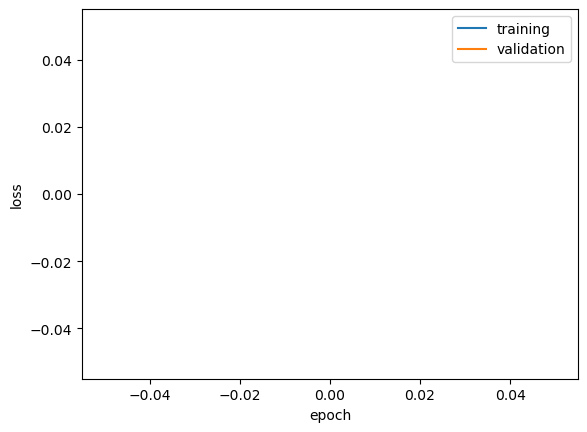

In [29]:
%matplotlib inline
from matplotlib import pyplot as plt

plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

In [30]:
for param_tensor in model.state_dict():
    print(param_tensor, "\n", model.state_dict()[param_tensor].numpy())

fc1.weight 
 [[nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]]
fc1.bias 
 [nan nan nan nan nan nan nan nan nan nan]
fc2.weight 
 [[nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]]
fc2.bias 
 [nan nan nan nan nan nan nan nan nan nan]
fc3.weight 
 [[nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]]
fc3.bias 
 [nan nan nan]


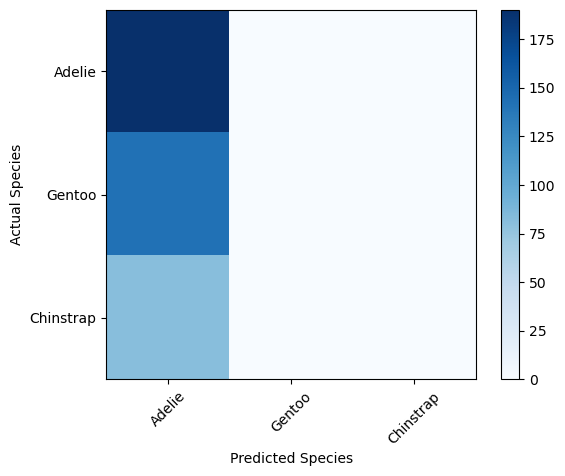

In [31]:
#Pytorch doesn't have a built-in confusion matrix metric, so we'll use SciKit-Learn
from sklearn.metrics import confusion_matrix
import numpy as np

# Set the model to evaluate mode
model.eval()

# Get predictions for the test data
x = torch.Tensor(x_test).float()
_, predicted = torch.max(model(x).data, 1)

# Plot the confusion matrix
cm = confusion_matrix(y_test, predicted.numpy())
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(penguin_classes))
plt.xticks(tick_marks, penguin_classes, rotation=45)
plt.yticks(tick_marks, penguin_classes)
plt.xlabel("Predicted Species")
plt.ylabel("Actual Species")
plt.show()

In [33]:
# Save the model weights
model_file = 'models/penguin_classifier.pt'
torch.save(model.state_dict(), model_file)
del model
print('model saved as', model_file)

FileNotFoundError: [Errno 2] No such file or directory: 'models/penguin_classifier.pt'

In [34]:
# New penguin features
x_new = [[50.4,15.3,20,50]]
print ('New sample: {}'.format(x_new))

# Create a new model class and load weights
model = PenguinNet()
model.load_state_dict(torch.load(model_file))

# Set model to evaluation mode
model.eval()

# Get a prediction for the new data sample
x = torch.Tensor(x_new).float()
_, predicted = torch.max(model(x).data, 1)

print('Prediction:',penguin_classes[predicted.item()])

New sample: [[50.4, 15.3, 20, 50]]


FileNotFoundError: [Errno 2] No such file or directory: 'models/penguin_classifier.pt'